In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [21]:
#Question 1
pd.__version__


'2.3.1'

In [20]:
#Question 2
len(df)

9704

In [14]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [15]:
#Question 3
df['fuel_type'].unique()

array(['Gasoline', 'Diesel'], dtype=object)

In [19]:
#Question 4
len(df.isnull().sum()[df.isnull().sum() > 0])

4

In [22]:
#Question 5
asian_cars = df[df['origin']=='Asia']
max_fuel_efficiency = asian_cars['fuel_efficiency_mpg'].max()
print(f'maximum fuel_efficiency of cars from Asia is {max_fuel_efficiency}')

maximum fuel_efficiency of cars from Asia is 23.759122836520497


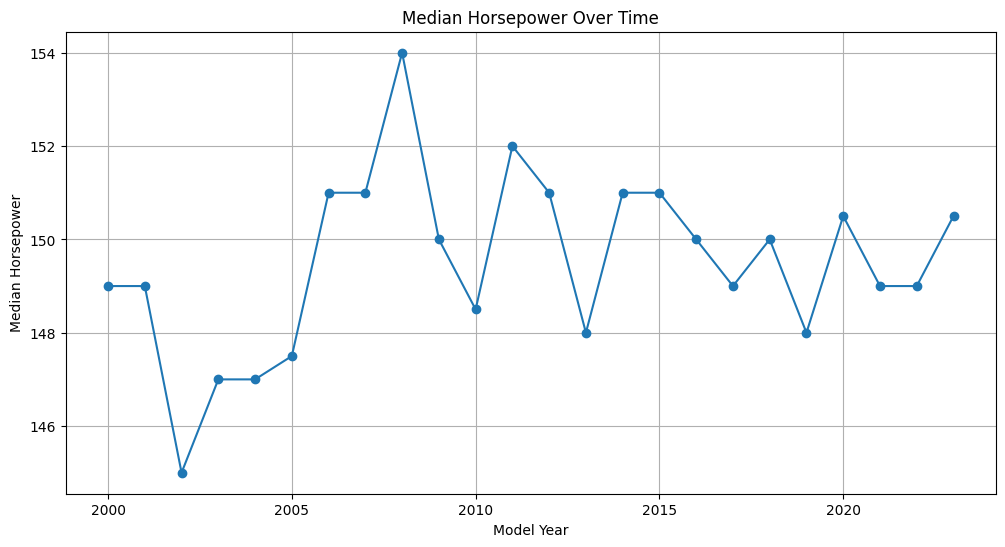

In [42]:
#Question 6
median_horsepower_by_year = df[['model_year','horsepower','origin']].groupby('model_year')['horsepower'].median()
plt.figure(figsize=(12, 6))
median_horsepower_by_year.plot(kind='line', marker='o')
plt.title('Median Horsepower Over Time')
plt.xlabel('Model Year')
plt.ylabel('Median Horsepower')
plt.grid(True)
plt.show()

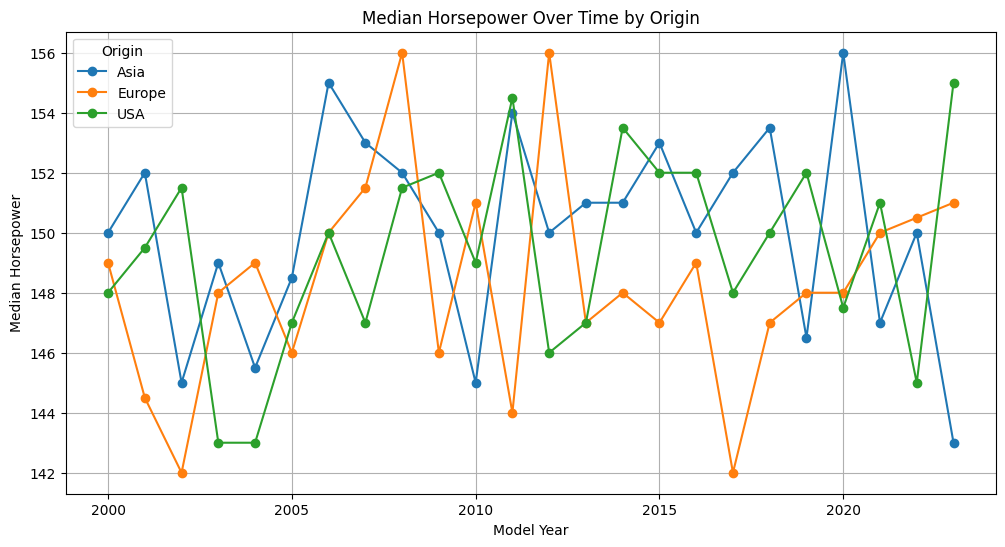

In [43]:

medians = df.groupby(['model_year', 'origin'])['horsepower'].median().unstack()
plt.figure(figsize=(12, 6))
medians.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Median Horsepower Over Time by Origin')
plt.xlabel('Model Year')
plt.ylabel('Median Horsepower')
plt.grid(True)
plt.legend(title='Origin')
plt.show()

In [3]:
# 1.
original_median = df['horsepower'].median()
print(f"Mediana Original: {original_median}")

# 2.
most_frequent = df['horsepower'].mode()[0]
print(f"Valor más frecuente: {most_frequent}")

# 3. 
df['horsepower'].fillna(most_frequent, inplace=True)

# 4.
new_median = df['horsepower'].median()
print(f"Mediana Nueva: {new_median}")

# 5.
if new_median > original_median:
    print("Sí, ha aumentado")
elif new_median < original_median:
    print("Sí, ha disminuido")
else:
    print("No, no ha cambiado")

Mediana Original: 149.0
Valor más frecuente: 152.0
Mediana Nueva: 152.0
Sí, ha aumentado


/tmp/ipykernel_15803/3589989176.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(most_frequent, inplace=True)


In [6]:
# 1.
asia_cars = df[df['origin'] == 'Asia']

# 2.
selected_columns = asia_cars[['vehicle_weight', 'model_year']]

# 3.
first_seven = selected_columns.head(7)

# 4.
X = first_seven.values

# 5.
XTX = np.dot(X.T, X)

# 6.
XTX_inv = np.linalg.inv(XTX)

# 7.
y = np.array([1100, 1300, 800, 900, 1000, 1100, 1200])

# 8.
w = np.dot(np.dot(XTX_inv, X.T), y)

# 9.
sum_w = np.sum(w)

print(f"La suma de todos los elementos de w es: {sum_w}")

La suma de todos los elementos de w es: 0.5187709081074016
